<a href="https://colab.research.google.com/github/Dr-Mamiz/Projects-Data-Analysis/blob/main/GLOVO_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOVO Dataset**
Questions are given in the project as a test for a job offer and then solved with the help of Python. It is a project of Data Analysis with Python.

Download Dataset File:
https://docs.google.com/spreadsheets/d/1FHzS6T4B8RzXYeynST3DIi1eKdRyGB3mzLM_0dXDDOs/edit#gid=490574737



**TASK**


1. There are 10 couriers in the city. Rank them from best to worst. Be creative and describe the approach. Find data on DATA: courier KPIs tab							
							
2. ALB is a very cold city in the winter. Snow invades the streets, and only CARS can ensure delivery. Today is day 1 of week 40, and the fleet must be replaced by the end of week 49. Assuming a 5% churn, and that we want to get to an average of 50 orders / courrier / week. Come up with a week by week onboarding plan, to meet the forecast of 5000 orders on week 50							
							
3.  Imagine there are 6 cities in which Glovo operates in Ukraine (UA). Data Sample in the tab DATA: main KPIs. Calculate following:							
- Average percentage of cancelled orders (cancelled orders/total orders) for each city
- Average percentage of cancelled orders in UA
- Cost per delivered order in UA
- Cost per delivered order in Kyiv							
							
4. Imagine you were informed that couriers organized a strike. Create an action plan with involvеment of other departments as well if it is needed.	

In [87]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Import dataset

data_GLOVO= pd.read_excel('/content/Business Case - V3 (1).xlsx')


**Usually I copy the dataset as df, to have the the original one safe in case I need to reuse it**

In [89]:
# Copy of our dataset
df=data_GLOVO.copy()

In [90]:
# Reading XL DATA in Python using Pandas - Exploring Option
# Importing the sheet DATA courier KPIs 
df=pd.ExcelFile('/content/Business Case - V3 (1).xlsx')
DATA_courier= df.parse('DATA_courier')
DATA_courier.head(12)

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**
0,1,Alex,100.0,25.0,3.0,0.98,7.0
1,2,Miguel,166.0,29.0,1.0,0.80,41.0
2,3,Antonio,62.0,31.0,6.0,0.85,44.0
3,4,Anna,109.0,37.0,2.0,1.00,16.0
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0
5,6,John,122.0,30.0,2.0,0.90,23.0
6,7,Salva,97.0,35.0,5.0,0.71,36.0
7,8,Enrique,156.0,36.0,1.0,0.89,11.0
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0
9,10,Marie,69.0,36.0,8.0,0.96,1.0


In [68]:
# Dataset DATA_courier SHAPE
DATA_courier.shape

(11, 7)

Our dataset contains DATA_courier contains 11 rows and 7 colomns.

In [6]:
# Basic information about our dataset DATA_courier
DATA_courier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #                       11 non-null     object 
 1   Courier                 10 non-null     object 
 2   Delivered orders        10 non-null     float64
 3   Delivery time, min      10 non-null     float64
 4   Bad rated orders        10 non-null     float64
 5   Acceptance rate*        10 non-null     float64
 6   Orders in peak hours**  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 744.0+ bytes


We don't have NAN values

# **TASK**

**Question 1:** There are 10 couriers in the city. Rank them from best to worst. Be creative and describe the approach. Find data on DATA: courier KPIs tab

To solve the question # 1, we'll rate the couriers through different angles:

**a- Rank the couriers from best to worst using the average delivery by time**

**b- Rank the couriers from best to worst using Bad rated orders**

**c- Rank the couriers from best to worst using the number of delivered orders**

**d- Rank the couriers from best to worst using the percentage of the orders not accepted**

**e- Rank the couriers from best to worst using the number of orders in peak hours**



In [69]:
# There are 10 couriers in the city. Rank them from best to worst.
# a- Rank the couriers from best to worst using the average delivery by time

# We sort the DATA_courier in ascending order for the column Delivery time .

DATA_courier.sort_values(by = ['Delivery time, min'], ascending= True) 

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0
0,1,Alex,100.0,25.0,3.0,0.98,7.0
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0
1,2,Miguel,166.0,29.0,1.0,0.80,41.0
5,6,John,122.0,30.0,2.0,0.90,23.0
2,3,Antonio,62.0,31.0,6.0,0.85,44.0
6,7,Salva,97.0,35.0,5.0,0.71,36.0
7,8,Enrique,156.0,36.0,1.0,0.89,11.0
9,10,Marie,69.0,36.0,8.0,0.96,1.0
3,4,Anna,109.0,37.0,2.0,1.00,16.0


Text(0, 0.5, 'Average delivery time')

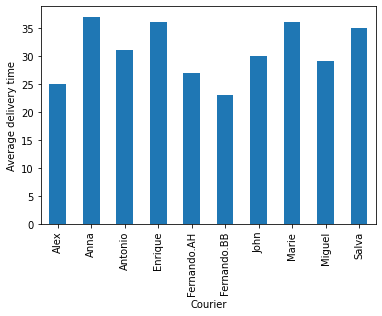

In [70]:
# visualization (bar)
DATA_courier.groupby('Courier')['Delivery time, min'].sum().plot(kind='bar')
plt.ylabel ('Average delivery time')


As we can see, the best courier in term of average delivery time is **Fernando.BB** since he has the best (smallest) average delivery time.

**Rank the couriers from best to worst using the average delivery by time**

.  1st position: **Fernando.BB**

.  2nd position: **Alex**

.  3rd position: **Fernando.BB**

.  4th position: **Miguel**

.  5th position: **Jhon**

.  6th position: **Antonio**

.  7th position: **Salva**

.  8th position: **Enrique**

.  9th position: **Marie**

.  10th position: **Anna**

In [71]:
# b- Rank the couriers from best to worst using Bad rated orders

# We sort the DATA_courier in ascending order for the column Bad rated orders .

DATA_courier.sort_values(by = ['Bad rated orders'], ascending= True) 

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**
1,2,Miguel,166.0,29.0,1.0,0.80,41.0
7,8,Enrique,156.0,36.0,1.0,0.89,11.0
3,4,Anna,109.0,37.0,2.0,1.00,16.0
5,6,John,122.0,30.0,2.0,0.90,23.0
0,1,Alex,100.0,25.0,3.0,0.98,7.0
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0
6,7,Salva,97.0,35.0,5.0,0.71,36.0
2,3,Antonio,62.0,31.0,6.0,0.85,44.0
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0
9,10,Marie,69.0,36.0,8.0,0.96,1.0


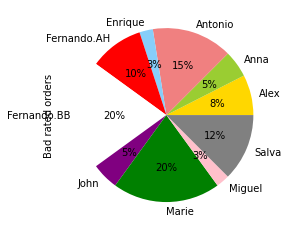

In [28]:
# Visialisation PIE
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red','white','purple','green','pink','gray']
DATA_courier.groupby(['Courier'])['Bad rated orders'].mean().plot.pie(autopct='%0.f%%',colors = colors)


As we can see, the best courier with the least amount of Bad rated orders	 are **Miguel & Enrique**, then on the 2nd position **Anna & Jhon**, on the 3rd position **Alex**, on the 4th position **Fernando.AH**, on the 5th postion **Salva**, on the 6th position **Antonio**, and finnaly on the last position **Fernando.BB & Marie**

# *Very important*

I believe that ranking the couriers on their **Bad rated orders** it's not something that we can take in consideration 100%, since the bad rating can be motivated by different reasons. For examples:



*   Courier could be late for few minutes and food was delivered with not significant delay.
*   Or the receiver of the delivery (client) could be in bad mood.
*   Or maybe the food package could be in bad condition.
*   Or the ordered items were wrong.





In [41]:
# c- Rank the couriers from best to worst using the number of delivered orders

# We sort the DATA_courier in ascending order for the column Delivered orders .

DATA_courier.sort_values(by = ['Delivered orders'], ascending= False)

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**
1,2,Miguel,166.0,29.0,1.0,0.80,41.0
7,8,Enrique,156.0,36.0,1.0,0.89,11.0
5,6,John,122.0,30.0,2.0,0.90,23.0
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0
3,4,Anna,109.0,37.0,2.0,1.00,16.0
0,1,Alex,100.0,25.0,3.0,0.98,7.0
6,7,Salva,97.0,35.0,5.0,0.71,36.0
9,10,Marie,69.0,36.0,8.0,0.96,1.0
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0
2,3,Antonio,62.0,31.0,6.0,0.85,44.0


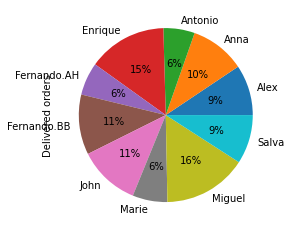

In [36]:
DATA_courier.groupby(['Courier'])['Delivered orders'].sum().plot.pie(autopct='%0.f%%')

As we can see, the best courier in terme of **number of delivered orders** is **Miguel** since he has the best value of delivered orders(166 otherwise 16%).

Rank the couriers from best to worst using the number of delivered orders

. 1st position: **Miguel**

. 2nd position: **Enrique**

. 3rd position: **Jhon**

. 4th position: **Fernando.BB**

. 5th position: **Anna**

. 6th position: **Alex**

. 7th position: **Salva**

. 8th position: **Marie**

. 9th position: **Fernando.AH**

. 10th position: **Antonio**

In [72]:
# d- Rank the couriers from best to worst using the percentage of the orders not accepted
# We create a new column for orders not accepted (100% - Acceptance rate*)
DATA_courier['Refuse_rate']=(1)-DATA_courier['Acceptance rate*']

DATA_courier.head(10)

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**,Refuse_rate
0,1,Alex,100.0,25.0,3.0,0.98,7.0,0.02
1,2,Miguel,166.0,29.0,1.0,0.80,41.0,0.20
2,3,Antonio,62.0,31.0,6.0,0.85,44.0,0.15
3,4,Anna,109.0,37.0,2.0,1.00,16.0,0.00
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0,0.01
5,6,John,122.0,30.0,2.0,0.90,23.0,0.10
6,7,Salva,97.0,35.0,5.0,0.71,36.0,0.29
7,8,Enrique,156.0,36.0,1.0,0.89,11.0,0.11
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0,0.06
9,10,Marie,69.0,36.0,8.0,0.96,1.0,0.04


In [73]:
# We sort the DATA_courier in descending order for the column Refuse_rate .

DATA_courier.sort_values(by = ['Refuse_rate'], ascending= True)

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**,Refuse_rate
3,4,Anna,109.0,37.0,2.0,1.00,16.0,0.00
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0,0.01
0,1,Alex,100.0,25.0,3.0,0.98,7.0,0.02
9,10,Marie,69.0,36.0,8.0,0.96,1.0,0.04
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0,0.06
5,6,John,122.0,30.0,2.0,0.90,23.0,0.10
7,8,Enrique,156.0,36.0,1.0,0.89,11.0,0.11
2,3,Antonio,62.0,31.0,6.0,0.85,44.0,0.15
1,2,Miguel,166.0,29.0,1.0,0.80,41.0,0.20
6,7,Salva,97.0,35.0,5.0,0.71,36.0,0.29


Text(0, 0.5, 'The % of orders refused')

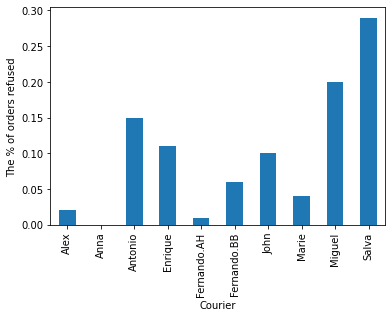

In [75]:
# visualization (bar)
DATA_courier.groupby('Courier')['Refuse_rate'].sum().plot(kind='bar')
plt.ylabel ('The % of orders refused')

As we can see, the best courier in terme of % of the orders refused is **Anna** with 0% of refused orders.

Rank the couriers from best to worst using Refuse_rate

. 1st position: Anna

. 2nd position: Fernando.AH

. 3rd position: Alex

. 4th position: Marie

. 5th position: Fernando.BB

. 6th position: Jhon

. 7th position: Enrique

. 8th position: Antonio

. 9th position: Miguel

. 10th position: Salva

In [74]:
#Finding Pearson's Correlation Coefficient (Bad rated orders VS Refuse_rate)
# CORRELATION

DATA_courier['Bad rated orders'].corr(DATA_courier['Refuse_rate'])
     
             

-0.07144679997842222

Our correlation of r = -0.071 suggest a weak, negative association between **the not accepted orders & the bad rating**

In [76]:
#Finding Pearson's Correlation Coefficient (Delivery time, min	 VS Bad rated orders)
# CORRELATION

DATA_courier['Delivery time, min'].corr(DATA_courier['Bad rated orders'])
     

-0.17582242816248697

We don't have a correlation between Delivery time, min &  Bad rated orders, since r= -0.175

In [77]:
#Finding Pearson's Correlation Coefficient (Delivery time, min	 VS Orders in peak hours**)
# CORRELATION

DATA_courier['Delivery time, min'].corr(DATA_courier['Orders in peak hours**'])

0.05866989253927778

Correlation r=0.05 indicates a moderate positive linear relationship between Delivery time, min	 &  Orders in peak hours

In [79]:
# e- Rank the couriers from best to worst using the number of orders in peak hours

# We sort the DATA_courier in ascending order for the column Orders in peak hours**	 .

DATA_courier.sort_values(by = ['Orders in peak hours**'], ascending= False)

,#,Courier,Delivered orders,"Delivery time, min",Bad rated orders,Acceptance rate*,Orders in peak hours**,Refuse_rate
2,3,Antonio,62.0,31.0,6.0,0.85,44.0,0.15
1,2,Miguel,166.0,29.0,1.0,0.80,41.0,0.20
6,7,Salva,97.0,35.0,5.0,0.71,36.0,0.29
5,6,John,122.0,30.0,2.0,0.90,23.0,0.10
3,4,Anna,109.0,37.0,2.0,1.00,16.0,0.00
8,9,Fernando.BB,119.0,23.0,8.0,0.94,14.0,0.06
7,8,Enrique,156.0,36.0,1.0,0.89,11.0,0.11
0,1,Alex,100.0,25.0,3.0,0.98,7.0,0.02
4,5,Fernando.AH,65.0,27.0,4.0,0.99,5.0,0.01
9,10,Marie,69.0,36.0,8.0,0.96,1.0,0.04


As we can see, the best courier in term of delivering orders in peak hours is Antonio with average of 44 orders.

Rank the couriers from best to worst using orders in peak hours

. 1st position: Antonio

. 2nd position: Miguel    

. 3rd position: Salva       

. 4th position: Jhon     

. 5th position: Anna

. 6th position: Fernando.BB            

. 7th position: Enrique 

. 8th position: Alex

. 9th position: Fernando.AH 

. 10th position: Marie

Text(0, 0.5, 'Acceptance_rate')

<Figure size 2880x1728 with 0 Axes>

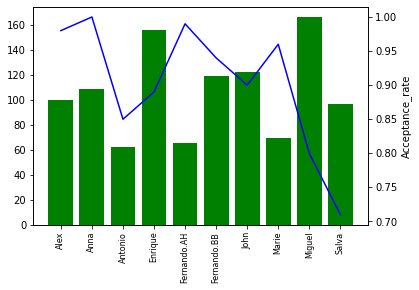

In [88]:
# Delivered orders  VS  Acceptance_rate

couriers=DATA_courier.groupby('Courier')['Delivered orders'].sum().index
Delivered_orders=DATA_courier.groupby('Courier')['Delivered orders'].sum()
Acceptance_rate=DATA_courier.groupby('Courier')['Acceptance rate*'].sum()
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(couriers,Delivered_orders, color='g')
ax2.plot(couriers,Acceptance_rate,'b-')
ax1.set_xticklabels(couriers,rotation='vertical',size=8)
plt.ylabel ('Acceptance_rate')

**Enrique** has a good rate of the acceptance and also he has a grate score of number delivered orders which gives him an average of accepted delivery 139, on the 2nd position we have **Miguel** with a great number of delivered orders **166** but less acceptance (0.8) getting an average of accepted delivery 133 delivery, then the 3rd & 4th places for  **Fernando.BB & Jhon** with a great score of delivered orders **119 & 122** and acceptance (average delivery 112 and 110),however **Anna & Alex** with their 5th & 6th positions  getting almost 100% of acceptance but average delivery accepted 109 & 98 delivery.
 **Salva** in the 7th position because he/she posses a good number of the delivered orders but a high rate of refuse orders(almost 69 of accepted delivery), and the 8th & 9th positions are for **Marie & Fernando.AH** since they have an amazing rate of acceptance but not a lot of delivery, finnaly **Antonio** has a lot of deliveries with a catastrophic rate of acceptance, getting around 53 deliveries accepted.

In [7]:

 # Importing the sheet DATA courier KPIs 
df=pd.ExcelFile('/content/Business Case - V3 (1).xlsx')
DATA_main= df.parse('DATA_main')
DATA_main.head(7)

,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH"
0,1,Kyiv right bank,10 000,124,29,1 000 000
1,2,Kyiv left bank,7 000,140,30,850 000
2,3,Lviv,6 000,78,41,630 000
3,4,Odesa,4 500,50,38,513 000
4,5,Dnipro,5 500,50,36,601 000
5,6,Kharkiv,6 300,91,27,580 000


# Question2- ALB is a very cold city in the winter. Snow invades the streets, and only CARS can ensure delivery. Today is day 1 of week 40, and the fleet must be replaced by the end of week 49. Assuming a 5% churn, and that we want to get to an average of 50 orders / courrier / week. Come up with a week by week onboarding plan, to meet the forecast of 5000 orders on week 50

In [ ]:
#Come up with a week by week onboarding plan, to meet the forecast of 5000 orders on week 50

For this question, We create a dataset of 11 weeks (from the week 40 to the week 50).

Our plan is to meet the forecast of 5000 orders on the week 50 assuming that it'll be 5% churn/week, and we want to get an average of 50 orders/courier/week.

We create a column week (week 50 to 40).

column 5% churn/week: in this column we're assuming decrease of deliveries by 5% each week. For example (week 49= 5000+ (5000*5%) =5250 orders. It means that for the week 50 we already lost 5% (250 orders) because we've lost also 5% of couriers.

On the week 49 we had **5250:50= 105 couriers and for the week 50 we have 5000:50=100 couriers**, and as we can see from the week 49 to the week 50, we have 5% less couriers. Otherwise, we had 105 couriers on week 49 and it left 100 couriers on the week 50.

on the dataset that I created **forecasting couriers** we can find the same manipulation for the other weeks.

In [64]:
# Importing the sheet DATA forcoasting couriers
df=pd.ExcelFile('/content/forcoasting_couriers.xlsx')
forcoasting_couriers= df.parse('forcoasting couriers')
forcoasting_couriers.head(10)

,week,5% churn per week,orders_per_week,wanted average 50 orders / courrier / week,forcoast couriers
0,50,0,5000,50,100
1,49,250,5250,50,105
2,48,263,5513,50,110
3,47,276,5789,50,116
4,46,289,6078,50,122
5,45,304,6379,50,128
6,44,319,6698,50,134
7,43,335,7385,50,148
8,42,352,7754,50,155
9,41,387,8142,50,163


Text(0, 0.5, 'The number of orders/week')

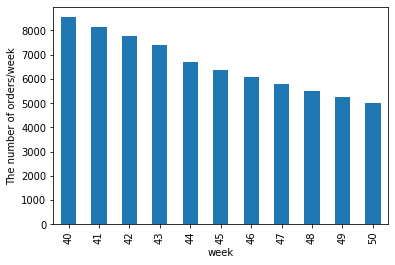

In [10]:
# visualization (bar)
forcoasting_couriers.groupby('week')['orders_per_week'].sum().plot(kind='bar')
plt.ylabel ('The number of orders/week')

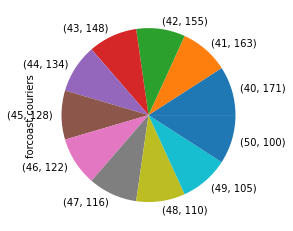

In [15]:
# Visialisation PIE (forcoast couriers from the week 40 to the week 50)

forcoasting_couriers.groupby(['week'])['forcoast couriers'].value_counts().plot.pie()

As we can see from the graph-bar: week after week we're loosing 5% of orders because of cold weather and snow and also only CARS can ensure delivery, so we start on the **week 40** with almost 8142 deliveries per week with 163 couriers to the end with 5000 orders and 100 couriers on the **week 50**

##Question 3
3- Imagine there are 6 cities in which Glovo operates in Ukraine (UA). Data Sample in the tab DATA: main KPIs. Calculate following:

a.   Average percentage of cancelled orders (cancelled orders/total orders) for each city

b.   Average percentage of cancelled orders in UA

c.   Cost per delivered order in UA

d.   Cost per delivered order in Kyiv

In [92]:
# Importing the sheet DATA main KPIs 
df=pd.ExcelFile('/content/Business Case - V3 (1).xlsx')
DATA_Main= df.parse('DATA_main')
DATA_Main.head(12)

,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH"
0,1,Kyiv right bank,10 000,124,29,1 000 000
1,2,Kyiv left bank,7 000,140,30,850 000
2,3,Lviv,6 000,78,41,630 000
3,4,Odesa,4 500,50,38,513 000
4,5,Dnipro,5 500,50,36,601 000
5,6,Kharkiv,6 300,91,27,580 000


In [94]:
# Basic information about our dataset
DATA_Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   #                              6 non-null      int64 
 1   City                           6 non-null      object
 2   Delivered orders               6 non-null      object
 3   Cancelled orders               6 non-null      int64 
 4   Delivered order duration, min  6 non-null      int64 
 5   Total cost, UAH                6 non-null      object
dtypes: int64(3), object(3)
memory usage: 416.0+ bytes


As we can see from the info, the column Delivered orders	 is an object and should be int64

In [67]:
# Changer le dtypes for the column Delivered orders
DATA_main['Delivered orders']=DATA_main['Delivered orders'].astype(float)

In [29]:
# a.   Average percentage of cancelled orders (cancelled orders/total orders) for each city
# First: we've to find the total orders

DATA_main['Delivered orders'].sum(axis = 0, skipna = True)

39300.0

**The total Delivered orders = 39300 orders**

In [99]:
# Second : We create a new column for Average percentage of cancelled orders/city (cancelled orders/total orders)
DATA_Main['avg_%_canelled_orders']=(DATA_Main['Cancelled orders']/(39300))*100

DATA_Main.head(10)

,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH",avg_%_canelled_orders
0,1,Kyiv right bank,10 000,124,29,1 000 000,0.315522
1,2,Kyiv left bank,7 000,140,30,850 000,0.356234
2,3,Lviv,6 000,78,41,630 000,0.198473
3,4,Odesa,4 500,50,38,513 000,0.127226
4,5,Dnipro,5 500,50,36,601 000,0.127226
5,6,Kharkiv,6 300,91,27,580 000,0.231552


We can see that the city of KYIV is separated into **Kyiv right bank & left bank**, so we can consider it as 1 city **Kyiv**, in this case we will create another column of cities where Kyiv will be 1 city


In [103]:
DATA_Main[['CITY','Situated']] = DATA_Main['City'].str.split(" ",n=1,expand=True)

DATA_Main.head(6)

,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH",avg_%_canelled_orders,CITY,Situated
0,1,Kyiv right bank,10 000,124,29,1 000 000,0.315522,Kyiv,right bank
1,2,Kyiv left bank,7 000,140,30,850 000,0.356234,Kyiv,left bank
2,3,Lviv,6 000,78,41,630 000,0.198473,Lviv,None
3,4,Odesa,4 500,50,38,513 000,0.127226,Odesa,None
4,5,Dnipro,5 500,50,36,601 000,0.127226,Dnipro,None
5,6,Kharkiv,6 300,91,27,580 000,0.231552,Kharkiv,None


As we can see from the last table that we created, the city Kyiv repeats twice so we have to  group it into 1 row  **Kyiv**

In [107]:

DATA_Main.groupby(['CITY'])['avg_%_canelled_orders'].sum()

CITY
Dnipro     0.127226
Kharkiv    0.231552
Kyiv       0.671756
Lviv       0.198473
Odesa      0.127226
Name: avg_%_canelled_orders, dtype: float64

Average percentage of cancelled orders (cancelled orders/total orders) for each city:

Dnipro     0.127226

Kharkiv    0.231552

Kyiv       0.671756

Lviv       0.198473

Odesa      0.127226

In [118]:
# b-Average percentage of cancelled orders in UA

DATA_Main['avg_%_canelled_orders'].sum(axis = 0, skipna = True)


1.3562340966921118

The avg of cancelled orders in Ukraine: 1.356%

In [128]:
# c. Cost per delivered order in UA
# 1st we remove the space in our column  Total cost, UAH	

DATA_Main['Total cost, UAH']=DATA_Main['Total cost, UAH'].str.replace(' ','')

DATA_Main.head(2)


,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH",avg_%_canelled_orders,CITY,Situated
0,1,Kyiv right bank,10 000,124,29,1000000,0.315522,Kyiv,right bank
1,2,Kyiv left bank,7 000,140,30,850000,0.356234,Kyiv,left bank


In [134]:
DATA_Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   #                              6 non-null      int64  
 1   City                           6 non-null      object 
 2   Delivered orders               6 non-null      object 
 3   Cancelled orders               6 non-null      int64  
 4   Delivered order duration, min  6 non-null      int64  
 5   Total cost, UAH                6 non-null      object 
 6   avg_%_canelled_orders          6 non-null      float64
 7   CITY                           6 non-null      object 
 8   Situated                       2 non-null      object 
dtypes: float64(1), int64(3), object(5)
memory usage: 560.0+ bytes


The column Total cost is in Dtype as an object and should be an int64 (integer)

In [135]:
# Changing the dtype for the the column Total cost
DATA_Main['Total cost, UAH']=DATA_Main['Total cost, UAH'].astype(float)


In [136]:
DATA_Main['Total cost, UAH'].sum(axis = 0, skipna = True)


4174000.0

# **The total cost for the  delivered orders in UA 4.174.000 UAH**

**Now, we need to find the cost/delivery in Ukraine**
cost/delivery = Total cost/Total number of delivery

In [156]:
# Deviding 
print (4174000 // 39300)




106


# c. The cost per delivered order in UA: **106 UAH**


In [159]:
# d.   Cost per delivered orders in Kyiv
# 1st: we remove the space in our column delivered orders
# 2nd: Changing the dtype for the the column Total cost
# 3nd: Total delivered orders in Kyiv
# 4th: Total cost in Kyiv
# 5th: the cost/delivery in Kyiv 
	
DATA_Main['Delivered orders']=DATA_Main['Delivered orders'].str.replace(' ','')

DATA_Main.head(2)


,#,City,Delivered orders,Cancelled orders,"Delivered order duration, min","Total cost, UAH",avg_%_canelled_orders,CITY,Situated
0,1,Kyiv right bank,10000,124,29,1000000.0,0.315522,Kyiv,right bank
1,2,Kyiv left bank,7000,140,30,850000.0,0.356234,Kyiv,left bank


In [162]:
DATA_Main['Delivered orders']=DATA_Main['Delivered orders'].astype(float)

In [165]:

DATA_Main.groupby(['CITY'])['Delivered orders'].sum()

CITY
Dnipro      5500.0
Kharkiv     6300.0
Kyiv       17000.0
Lviv        6000.0
Odesa       4500.0
Name: Delivered orders, dtype: float64

Total delivered orders in Kyiv: **17000 deliveries**

In [166]:
DATA_Main.groupby(['CITY'])['Total cost, UAH'].sum()

CITY
Dnipro      601000.0
Kharkiv     580000.0
Kyiv       1850000.0
Lviv        630000.0
Odesa       513000.0
Name: Total cost, UAH, dtype: float64

The total cost of delivery in Kyiv: **1.850.000 UAH**




Now, we need to find the cost/delivery in **Kyiv** cost/delivery = Total cost in Kyiv/Total number of delivery in Kyiv

In [167]:
# Deviding 
print (1850000 // 17000)

108


# c. The cost per delivered orders in Kyiv: **108 UAH**


**4. Imagine you were informed that couriers organized a strike. Create an action plan with involvеment of other departments as well if it is needed.**

**ANSWER**

The strike can be motivated by different reasons and the solution will depend on the type of the problem.

If strike is related to the salary, General manager and Financial Director have to be involved. Data analytic can help by creating the updated statistics on the average salaries by regions according to the amount of the performed job.

On the moment of strike data analyst can also make prediction on the income loses. 

If the strike is related to the taxes payment or other work related problems, lawyer, human recourses and the management if the company should work together.

